### Problem Statement : Build the linear regression model using scikit learn in boston data to predict 'Price' based on other dependent variable.

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston

In [2]:
#Load the required boston data:
boston = load_boston()

#### Let's learn about the dataset at first:

In [4]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [6]:
#The full description of the dataset:
boston.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

#### My Key understandings from the dataset description :

#### EDA:

In [7]:
#The names of features:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [8]:
#target:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [9]:
data = boston.data

In [10]:
#create a dataframe of the boston data:
bs = pd.DataFrame(data = data, columns=boston.feature_names)

In [11]:
#chacek the top 5 data points of tye dataset:
bs.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [12]:
#check the shape of the data:
bs.shape

(506, 13)

In [13]:
#Include the traget column MDEV to the dataframe:
bs['Price'] = boston.target

In [14]:
bs.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [15]:
#check if any null/missing values are present in the dataset or not:
bs.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [16]:
bs.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


#### Data Visualization: To check the pairwise (column vs column) relationships in the dataset

C:\Users\91842\anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


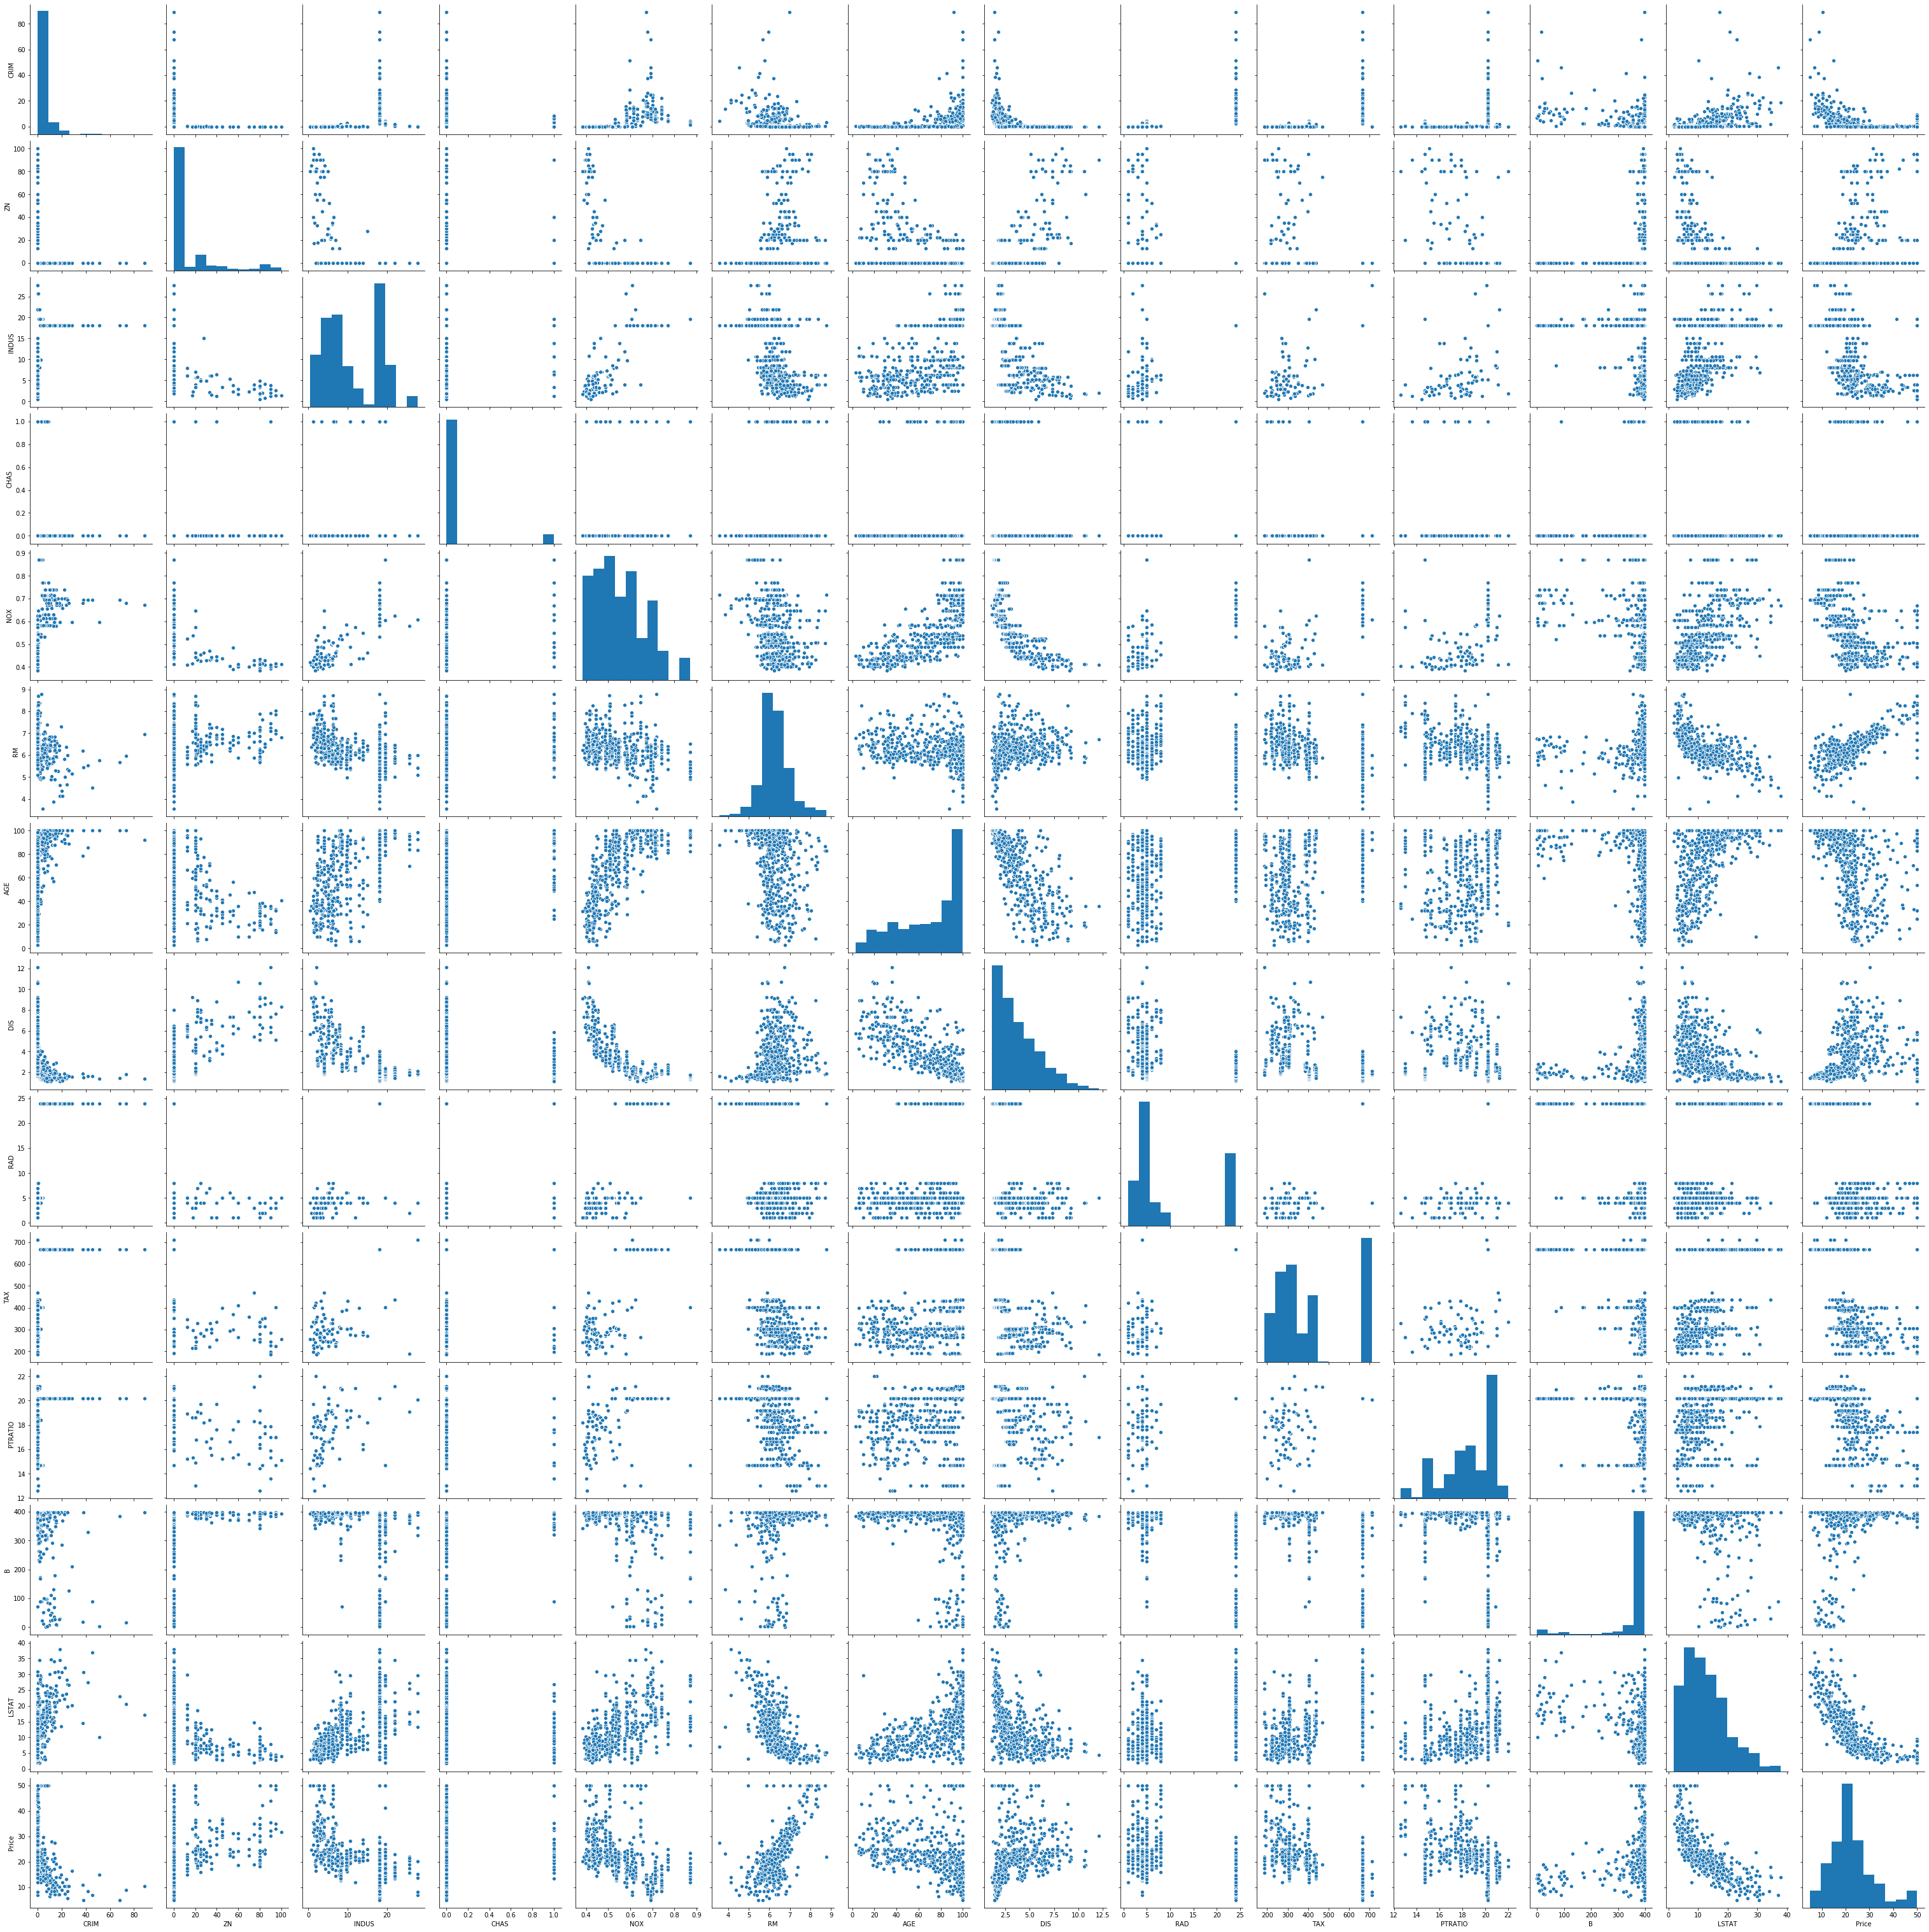

In [14]:
#Visualize the column vs column plot:
import seaborn as sns
sns.pairplot(bs,size=3)

In [17]:
#Dropping the unnecessary feature: I assume the coumn Charles River does not play vital role in the Home price prediction, hence dropping the column.
bs=bs.drop('CHAS', axis=1)

In [16]:
#Again check the top 5 records now:
bs.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


#### Visualize the distribution of feature values:
It is easier to model features with normal (or near normal) distributions with greater accuracy. Finding distribution of values of the features helps in the exploratory phase helps in deciding which features need to be scaled appropriately in the feature engineering phase.

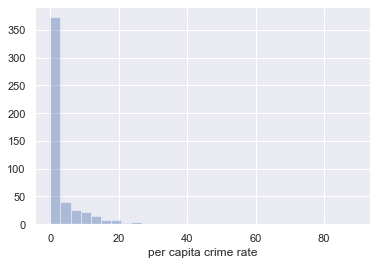

In [138]:
fig = plt.figure()
sns.distplot(bs.CRIM.values, bins=30, kde=False)
plt.xlabel('per capita crime rate', fontsize=12)
plt.show()

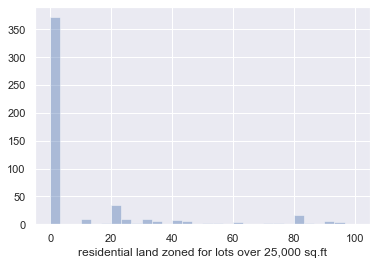

In [139]:
fig = plt.figure()
sns.distplot(bs.ZN.values, bins=30, kde=False)
plt.xlabel('residential land zoned for lots over 25,000 sq.ft', fontsize=12)
plt.show()

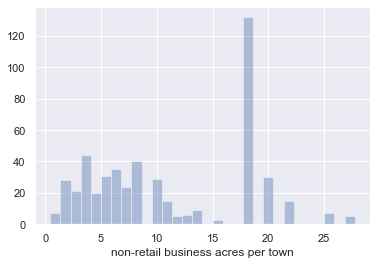

In [140]:
fig = plt.figure()
sns.distplot(bs.INDUS.values, bins=30, kde=False)
plt.xlabel('non-retail business acres per town', fontsize=12)
plt.show()

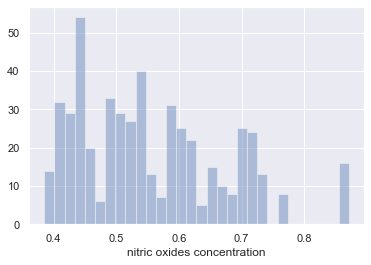

In [143]:
fig = plt.figure()
sns.distplot(bs.NOX.values, bins=30, kde=False)
plt.xlabel('nitric oxides concentration', fontsize=12)
plt.show()

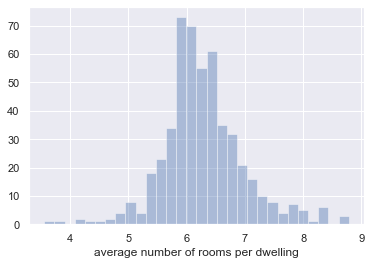

In [144]:
fig = plt.figure()
sns.distplot(bs.RM.values, bins=30, kde=False)
plt.xlabel('average number of rooms per dwelling', fontsize=12)
plt.show()

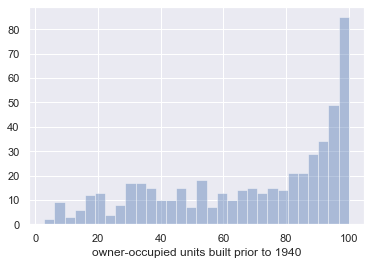

In [145]:
fig = plt.figure()
sns.distplot(bs.AGE.values, bins=30, kde=False)
plt.xlabel('owner-occupied units built prior to 1940', fontsize=12)
plt.show()

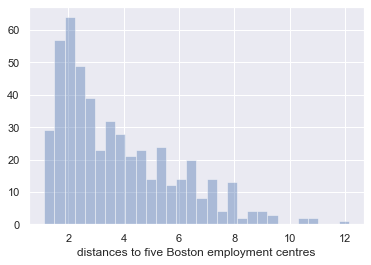

In [146]:
fig = plt.figure()
sns.distplot(bs.DIS.values, bins=30, kde=False)
plt.xlabel('distances to five Boston employment centres', fontsize=12)
plt.show()

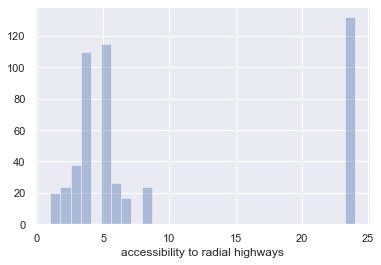

In [147]:
fig = plt.figure()
sns.distplot(bs.RAD.values, bins=30, kde=False)
plt.xlabel('accessibility to radial highways', fontsize=12)
plt.show()

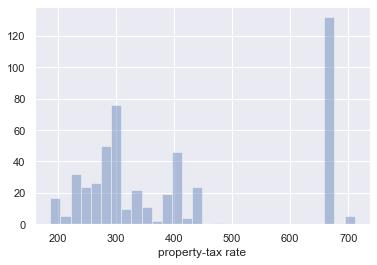

In [148]:
fig = plt.figure()
sns.distplot(bs.TAX.values, bins=30, kde=False)
plt.xlabel('property-tax rate', fontsize=12)
plt.show()

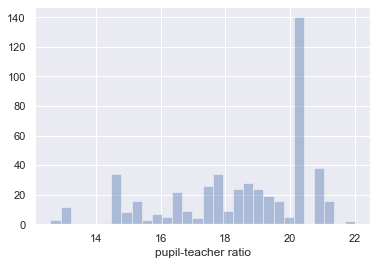

In [149]:
fig = plt.figure()
sns.distplot(bs.PTRATIO.values, bins=30, kde=False)
plt.xlabel('pupil-teacher ratio', fontsize=12)
plt.show()

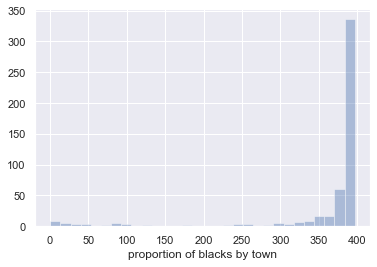

In [150]:
fig = plt.figure()
sns.distplot(bs.B.values, bins=30, kde=False)
plt.xlabel('proportion of blacks by town', fontsize=12)
plt.show()

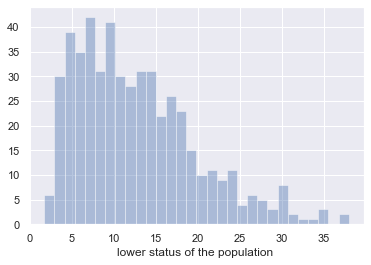

In [151]:
fig = plt.figure()
sns.distplot(bs.LSTAT.values, bins=30, kde=False)
plt.xlabel('lower status of the population ', fontsize=12)
plt.show()

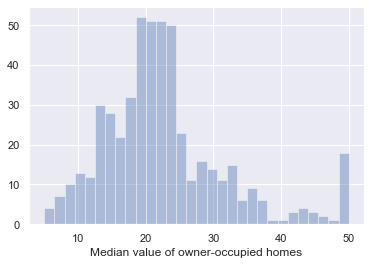

In [152]:
fig = plt.figure()
sns.distplot(bs.Price.values, bins=30, kde=False)
plt.xlabel('Median value of owner-occupied homes', fontsize=12)
plt.show()

#### Finding multi-cillinearity between features :

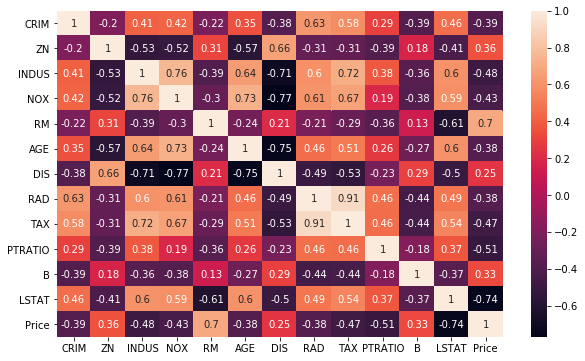

In [19]:
fig, ax = plt.subplots(figsize = (10,6))
sns.heatmap(bs.corr(),annot=True)

In [20]:
#quantifize the correlation matrix :
bs.corr()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
NOX,0.420972,-0.516604,0.763651,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536
PTRATIO,0.289946,-0.391679,0.383248,0.188933,-0.355501,0.261515,-0.232471,0.464741,0.460853,1.000000,-0.177383,0.374044,-0.507787


In [ ]:
#Removal of correalted fields:
#bs = bs.drop('NOX','DIS')

#### Linear Regression Model Creation:

In [18]:
# create X and y:
X = bs[['CRIM', 'ZN', 'INDUS', 'RM', 'AGE', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]
y = bs[['Price']]

In [19]:
#split the data into 67% training and 33% testing data:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.33,random_state=42)

In [20]:
#sklearn LR model creation: import, instantiate, fit
from sklearn.linear_model import LinearRegression

#create the LinearRegression instance:
reg = LinearRegression()

#train the model with training data set:
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
#print intercept and coefficients:
print(reg.intercept_)
print(reg.coef_)

[15.119013]
[[-1.02928070e-01  2.97285475e-03  1.11238255e-01  4.34223020e+00
   9.61668073e-03  2.36863575e-01 -9.74310954e-03 -9.13594262e-01
   1.31295240e-02 -6.00991505e-01]]


In [22]:
#print the predicstions on our test data:
y_pred = reg.predict(x_test)

In [23]:
print(y_pred[0])

[27.12304926]


In [24]:
#print the actual y value of the 1st record:
print(y_test)

     Price
173   23.6
274   32.4
491   13.6
72    22.8
452   16.1
..     ...
110   21.7
321   23.1
265   22.8
29    21.0
262   48.8

[167 rows x 1 columns]


#### Check the accuracy of the model: Measure how good the fit is
1.Calculation of R squared - it represents how much of our data is being explained by the created model. 
2.Calculation of adjusted R sqaured - it is almost similar to R squared score but the only difference is that it considers the effects of increased features which actually do not correlate with the output data. Adjusted R2 is used to penalize the excessive use of such features.

Adjusted R squared will always be less than or equal to R squared, and it penalises the excess of independent variables which do not affect the dependent variable.

In [25]:
# Let's create a function to create adjusted R-Squared
def adj_r2(x,y):
    r2 = reg.score(x_test,y_test)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [26]:
reg.score(x_train,y_train)

0.7024982397512417

In [27]:
adj_r2(x_train,y_train)

0.6752049194901955

In [28]:
reg.score(x_test,y_test)

0.6848142413987696

In [29]:
adj_r2(x_test,y_test)

0.6646100261038188

#### Regularization : It will help sort the overfitting problem by restricting the degrees of freedom of the given equation

In a linear equation, we do not want huge weights/coefficients as a small change in weight can make a large difference for the dependent variable (y). So, regularization constraints the weights of such features to avoid overfitting.

There are 3 different types of regularizations in regression: LASSO, RIDGE and Elastic Net.

We will use RIDGE regularization as we know that there is not very high correlation but there might be case that our model is overfitted. 

In [30]:
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV

In [31]:
# Using Ridge regression model
# RidgeCV will return best alpha and coefficients after performing 10 cross validations. 
# We will pass an array of random numbers for ridgeCV to select best alpha from them

alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas = alphas,cv=10,normalize = True)
ridgecv.fit(x_train, y_train)

RidgeCV(alphas=array([1.0480947 , 7.62029752, 5.8699986 , 8.21881189, 9.03432186,
       9.32731221, 7.91022219, 8.11410669, 6.92052014, 7.95172464,
       8.84278729, 4.38839116, 9.19624286, 4.57688623, 7.9405357 ,
       2.77236531, 6.38986943, 5.88203246, 9.40468327, 0.32227446,
       0.28639899, 1.02241763, 4.83911658, 1.93039328, 8.70675991,
       1.9523621 , 6.43887625, 2.02482372, 5.32269776, 2.33385555,
       1.81796916, 0.69060856, 0.89694941, 1.15413844, 1.76758561,
       6.66251867, 8.48901343, 8.40240658, 3.36946487, 0.99473374,
       3.35546519, 6.81050507, 2.11640115, 9.76945012, 7.09153287,
       4.18456513, 9.37766462, 7.85342441, 8.28596048, 5.67503228]),
        cv=10, fit_intercept=True, gcv_mode=None, normalize=True, scoring=None,
        store_cv_values=False)

In [32]:
ridgecv.alpha_

0.28639898949043285

In [33]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train, y_train)

Ridge(alpha=0.28639898949043285, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [34]:
ridge_model.score(x_test, y_test)

0.6848174081120014

#### Conclusion : Here we got the same R squared using Ridge regression. So, it's safe to say there is no overfitting.